In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [39]:
#https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set

In [40]:
df = pd.read_csv("car_evaluation.csv")

In [41]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [42]:
col_names = ["buying", "maintenance", "doors", "persons", "lug_boot", "safety", "class"]

In [43]:
df.columns = col_names

In [44]:
df.head()

,buying,maintenance,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buying       1727 non-null   object
 1   maintenance  1727 non-null   object
 2   doors        1727 non-null   object
 3   persons      1727 non-null   object
 4   lug_boot     1727 non-null   object
 5   safety       1727 non-null   object
 6   class        1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [46]:
for col in df.columns:
    print(df[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maintenance
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [47]:
df.isnull().sum()

buying         0
maintenance    0
doors          0
persons        0
lug_boot       0
safety         0
class          0
dtype: int64

In [48]:
df["doors"].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [49]:
df["doors"] = df["doors"].replace("5more", "5")

In [50]:
df["doors"].unique()

array(['2', '3', '4', '5'], dtype=object)

In [51]:
df["doors"] = df["doors"].astype(int)

In [52]:
df["persons"].unique()

array(['2', '4', 'more'], dtype=object)

In [53]:
df["persons"] = df["persons"].replace("more", "5")

In [54]:
df["persons"] = df["persons"].astype(int)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buying       1727 non-null   object
 1   maintenance  1727 non-null   object
 2   doors        1727 non-null   int64 
 3   persons      1727 non-null   int64 
 4   lug_boot     1727 non-null   object
 5   safety       1727 non-null   object
 6   class        1727 non-null   object
dtypes: int64(2), object(5)
memory usage: 94.6+ KB


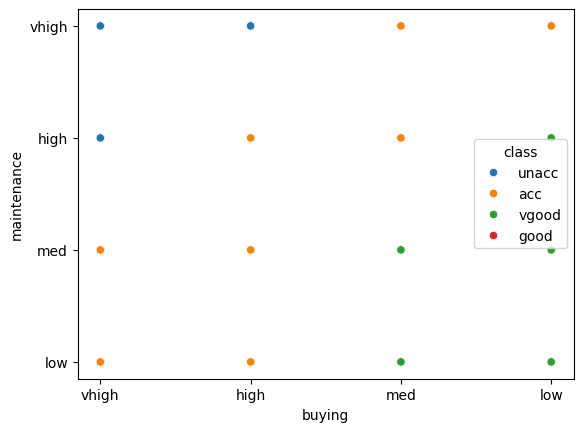

In [56]:
sns.scatterplot(x=df["buying"], y=df["maintenance"], hue=df["class"])

plt.show()

In [57]:
X = df.drop("class", axis=1)

y = df["class"]

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

In [60]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [61]:
categorial_cols = ["buying", "maintenance", "lug_boot", "safety"]
numerical_cols = ["persons", "doors"]

In [62]:
for col in categorial_cols:
    print(df[col].unique())

['vhigh' 'high' 'med' 'low']
['vhigh' 'high' 'med' 'low']
['small' 'med' 'big']
['med' 'high' 'low']


In [63]:
ordinal_encoder = OrdinalEncoder(categories=[
    ["low", "med", "high", "vhigh"], #buying
    ["low", "med", "high", "vhigh"], #maintenance
    ["small", "med", "big"], #lug_boot
    ["low", "med", "high"] #safety
])

#Allows for multiple column transformations using different encoders and column lists
preprocessor = ColumnTransformer(
    transformers=[
        ("insert_cool_and_unimportant_name_here", ordinal_encoder, categorial_cols),
        #("insert_cool_and_unimportant_name_here", one_hot_encoder, one_hot_cols),
    ],
    remainder="passthrough" #Important! Might drop other columns that aren't being transformed by it
)

In [64]:
X_train = preprocessor.fit_transform(X_train)

X_test = preprocessor.transform(X_test)

In [65]:
pd.DataFrame(X_train)[1].unique()

array([3., 2., 0., 1.])